In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data
column_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("pico.data",sep = "\t",names=column_names)

In [3]:
#Having a look at the data
df.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df.info()
#Basically we are having information corresponding to each unique user id(our dataset has one user id to many item id)
#User id can also provide ratings on multiple items(one user id but have multiple item id)-case aperson has watched a lot of movies and provided ratings to a lot of movies
#Rating is basically what rating does a person has given on a movie with a particular id
#So basically our data contains 100000 records of movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
#Loading a file into csv containing movie id's and corresponding movie titles
df1 = pd.read_csv("Movie_Id_Titles")
df1.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#Basically as we are having the item_id column in both the dataframe so joining both he dataframe on item_id
final_df = pd.merge(df,df1,on="item_id")
final_df.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [7]:
#Performing some of the exploratory data analysis on the dataframe(EDA)
#Finding the average of the ratings of movie corresponding grouped by the title
final_df.groupby("title")["rating"].mean().sort_values(ascending=False).head(5)

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [8]:
#As we are getting the ratings(average) of the movies it might be also possible that some movie may appear at upper position- 
#-when sorted in descending order but might not be so much popular as there is also a case of movie being rated by very-
#-less no of peoples(whoever rated the movie rated it good but not rated by a lagre number of peoples)
#So basically getting the counts of the movie ratings
final_df.groupby("title")["rating"].count().sort_values(ascending=False).head(5)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
#Now creating a datframe of titles and their average rating and also the no of counts of ratings
df_tr = pd.DataFrame(final_df.groupby("title")["rating"].mean())
df_tr["rating_counts"] = pd.DataFrame(final_df.groupby("title")["rating"].count())
df_tr.head(5)
#Now my dataframe has both the movie average rating and the count of the no of person who rated

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


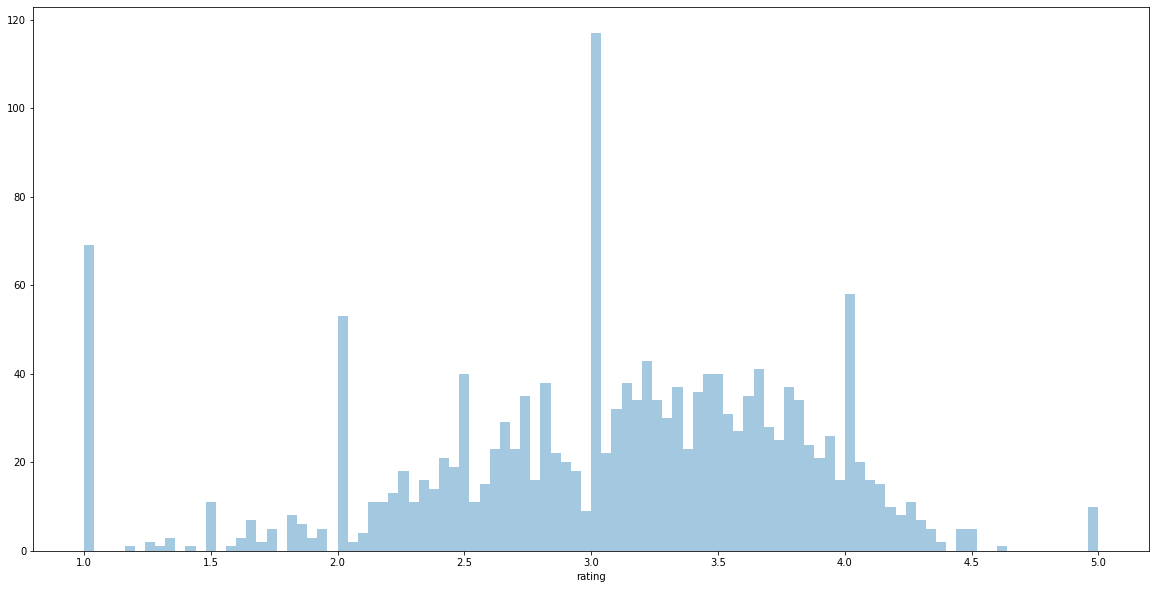

In [10]:
plt.figure(figsize = (20,10))
sns.distplot(df_tr["rating"], kde=False, bins=100)
#A figure showing the rating(looks like most of the user has given ratings to the movie in between 2 to 4)
#More likely follows a gaussian distribution

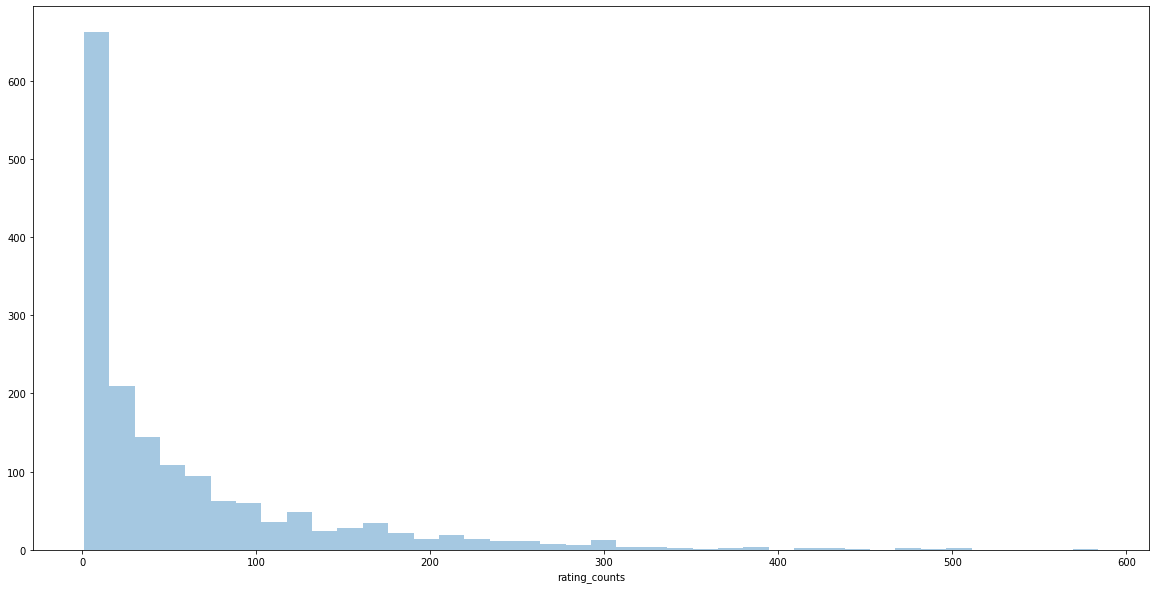

In [11]:
plt.figure(figsize = (20,10))
sns.distplot(df_tr["rating_counts"], kde=False, bins=40)
#Plotting a histogram of rating_counts

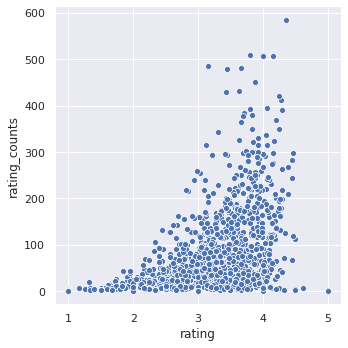

In [12]:
#Joint plotting both of the feature rating and rating_counts
sns.set(style="darkgrid")
sns.relplot(x = "rating",y = "rating_counts",data = df_tr)

In [13]:
df_tr.head(5)

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [14]:
#Basically sorting the df_tr on_basis of thr rating_counts
df_tr.sort_values("rating_counts",ascending=False).head(5)

,rating,rating_counts
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [15]:
#Now let us create a matrix that will be having the user_ids on axis and the movies title on the other column and the rating as the data of the matrix
matrix = final_df.pivot_table(index = "user_id",columns = "title",values = "rating")
matrix.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Now basically considering a scenario we have seen a movie which is the next movie recommended to be seen
#So let us take the movie Star Wars
star_wars = matrix["Star Wars (1977)"]
star_wars.head()
#It basically conains the user id and the rating given by the person with the user id to the movie 

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [17]:
#As it can be seen that there are approximately 944 users with ratings(may be NaN somewhere)
print(len(star_wars))

944


In [18]:
#Now using correlation to find the movies which are like each other on basis of ratings
#So movies similar to Star Wars are
movies_similar = matrix.corrwith(star_wars)
movies_similar_df = pd.DataFrame(movies_similar,columns = ["Correlation"])
movies_similar_df.sort_values("Correlation",ascending=False).head()
#Also we can drop the NaN value as we will also be having some of the NaN value in dataset
#What this correlation is telling is that the more the correlation between the movies the more similar the movies are, and are having the more chances of being recommended

/home/bluebrain/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/bluebrain/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [19]:
#Lets now filter out the movies having less tha a particular number of reviews
movies_similar_df = movies_similar_df.join(df_tr["rating_counts"])
movies_similar_df.head(5)

,Correlation,rating_counts
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [20]:
#Now basically sorting the movies having more than 100 rating_counts
movies_similar_df[movies_similar_df["rating_counts"]>100].sort_values("Correlation",ascending = False).head(5)
#All these movies are the movie recommended in case we have seen the Starwars(on basis of correlation between the movies)

,Correlation,rating_counts
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


This is basically how we use correlation to find out the correlation in between the movies and also finding the next movie(or say movies) recommended